<a href="https://colab.research.google.com/github/FaradillaRoudhotulSanaa/PCVK_Ganjil_2024/blob/main/Modul3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Transformasi Linier Brightness**

Formula: g(x,y)=f(x,y)+b

g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, b adalah nilai brightness



In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


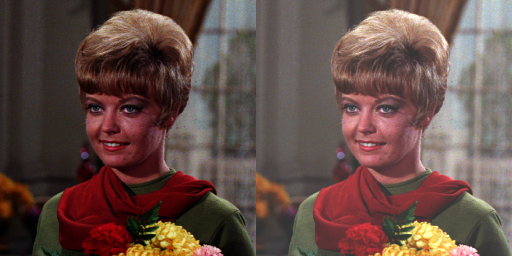

In [ ]:
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/image/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# Akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# Cara simple tanpa for loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

## **TUGAS PRAKTIKUM**

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

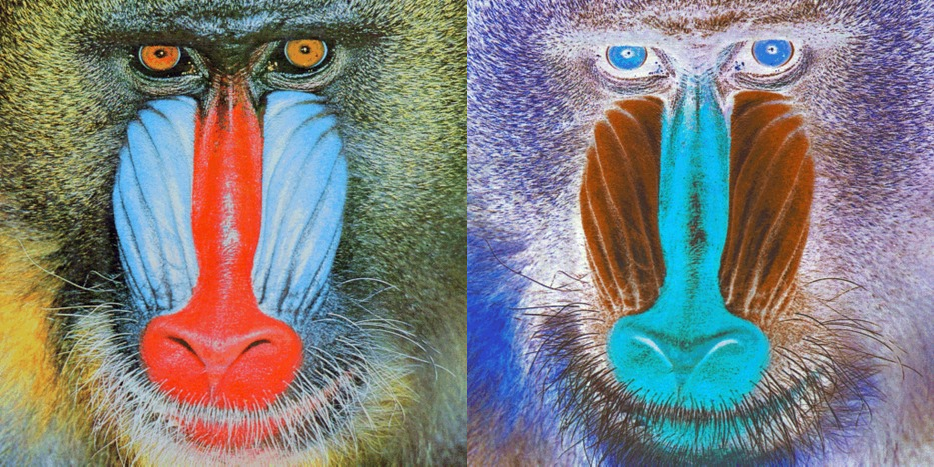

In [ ]:
img3 = cv.imread('/content/drive/MyDrive/PCVK/image/img_m3.jpg')

# Membuat citra inverse/negative
inverseImg = 255 - img3

# Tampilkan citra asli dan inverse citra
final_frame = cv.hconcat((img3, inverseImg))
cv2_imshow(final_frame)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


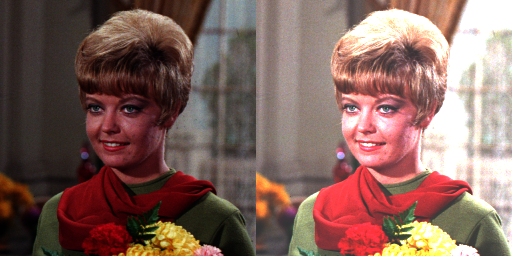

In [ ]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------------------')

# Mengambil input dari user untuk kecerahan dan kontras
try:
    brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
    contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
    print('Error, masukkan angka yang valid.')

# Membaca gambar asli
original = cv.imread('/content/drive/MyDrive/PCVK/image/female.tiff')

# Buat gambar baru dengan kontras dan kecerahan diubah
brightness_contrast_image = np.zeros(original.shape, original.dtype)

# Mengakses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            # rumus = g(x,y)=a*f(x,y)+b -> brighnest contrast
            brightness_contrast_image[y, x, c] = np.clip(contrast * original[y, x, c] + brightness, 0, 255)

# Cara simple tanpa for-loop:
# brightness_contrast_image = cv.convertScaleAbs(original, alpha=contrast, beta=brightness)

# Gabungkan gambar asli dengan gambar hasil pengaturan kontras dan kecerahan
final_frame = cv.hconcat((original, brightness_contrast_image))

# Tampilkan hasil
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:


Mengubah tingkat kecerahan citra dengan transformasi log
--------------------------------------------------------
Masukkan nilai kecerahan: 50


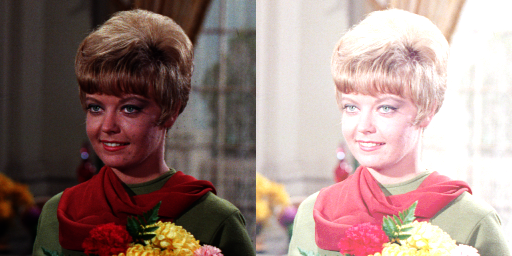

In [ ]:
print('Mengubah tingkat kecerahan citra dengan transformasi log')
print('--------------------------------------------------------')

# Mengambil input dari user untuk kecerahan
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, masukkan angka yang valid.')

# Membaca gambar asli
original = cv.imread('/content/drive/MyDrive/PCVK/image/female.tiff')

# Buat gambar baru dengan nilai kontras dan kecerahan diubah
brightness_image2 = np.zeros(original.shape, original.dtype)

# Konversi gambar ke float32 untuk operasi logaritma
image_float = np.float32(original)

# Parameter konstanta (c), disesuaikan agar hasil terlihat lebih baik
c = 255 / np.log(1 + np.max(image_float))

# Menerapkan transformasi logaritma
log_transformed = c * (np.log(1 + image_float))

# Normalisasi hasil ke dalam rentang [0, 255]
log_transformed = np.uint8(np.clip(log_transformed, 0, 255))

# Meningkatkan kecerahan sesuai input user
log_transformed = cv.convertScaleAbs(log_transformed, alpha=1, beta=brightness)

# Gabungkan gambar asli dengan gambar hasil pengaturan kontras dan kecerahan
final_frame = cv.hconcat([original, log_transformed])

# Tampilkan hasil
cv2_imshow(final_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

a. **Averaging**

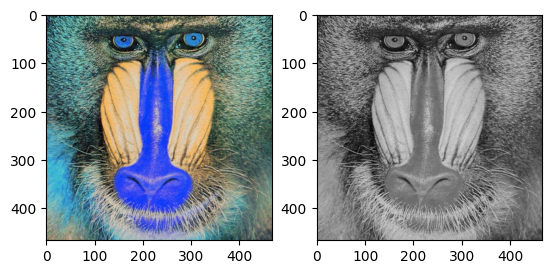

In [ ]:
img_avg = cv.imread('/content/drive/MyDrive/PCVK/image/img_m3.jpg')
img_avg[:] = img_avg.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img3)
ax[1].imshow(img_avg)

b. **Lightness**

In [ ]:
img_ori = cv.imread('/content/drive/MyDrive/PCVK/image/img_m3.jpg')

# Ekstrak channel warna Red, Green, dan Blue
B, G, R = cv.split(img_ori)

# Menerapkan metode Lightness: (max[R, G, B] + min[R, G, B]) / 2
max_rgb = np.maximum(np.maximum(R, G), B)
min_rgb = np.minimum(np.minimum(R, G), B)

# Menerapkan metode averaging grayscale: max[R, G, B] + min[R, G, B] / 2
lightness = ((max_rgb + min_rgb) / 2).astype(np.uint8)

grayscale_lightness = cv.cvtColor(grayscale_avg, cv.COLOR_GRAY2BGR)# convert grayscale to BGR
# Convert dilakukan untuk memastikan bahwa kedua gambar yang akan digabungkan
# memiliki jumlah channel yang sama.

final_frame = cv.hconcat([img_ori,grayscale_lightness])
cv2_imshow(final_frame)

c. **Luminance**

In [ ]:
img_ori = cv.imread('/content/drive/MyDrive/PCVK/image/img_m3.jpg')

# Ekstrak channel warna Red, Green, dan Blue
B, G, R = cv.split(img_ori)

# Menerapkan metode averaging grayscale: 0.21R + 0.72G + 0.07B
luminance = ((0.21*R) + (0.72*G) + (0.07*B)).astype(np.uint8)

greyscale_luminance = cv.cvtColor(grayscale_avg, cv.COLOR_GRAY2BGR) # convert grayscale to BGR
# Convert dilakukan untuk memastikan bahwa kedua gambar yang akan digabungkan
# memiliki jumlah channel yang sama.

final_frame = cv.hconcat([img_ori,greyscale_luminance])
cv2_imshow(final_frame)

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

In [ ]:
img_ori = cv.imread('/content/drive/MyDrive/PCVK/image/img_m3.jpg')

# Memisahkan gambar menjadi tiga channel: Biru (B), Hijau (G), dan Merah (R)
B, G, R = cv.split(img_ori)

# Membuat versi grayscale dari gambar menggunakan metode rata-rata
grayscale = cv.cvtColor(img_ori, cv.COLOR_BGR2GRAY)

# Menggabungkan channel-channel kembali, dengan channel Biru dari gambar asli,
# sementara channel Hijau dan Merah digantikan dengan gambar grayscale
result_img = cv.merge([B, grayscale, grayscale])

# Menggabungkan gambar asli dan gambar hasil manipulasi secara horizontal
final_frame = cv.hconcat([img_ori, result_img])

# Menampilkan hasil akhir
cv2_imshow(final_frame)